# 1 - Introduction

#### Name : Hedy Fernando
#### Batch : 001-HCK
#### Data-Set : water_quality.csv
#### Objective : Create a Model for classification water quality is Potable or Not Potable 

> Data Knowledge

- **Power of hydrogen atau disingkat pH** adalah ukuran untuk menilai tingkat keasaman atau kebasaan suatu cairan. Skalanya dari angka 1 hingga 14. Air minum biasa memiliki kandungan pH sebesar 7, yang dianggap netral karena tidak memiliki kualitas asam ataupun basa. Jika kadar pH di bawah 7, air ini disebut asam. Sementara air dengan pH di atas 7 berarti basa atau alkali. standar pH air minum yang dinilai **baik untuk kesehatan adalah antara 6,5 dan 8,5.** Jika kadar pH terlalu jauh di luar skala, bisa saja tidak aman bagi tubuh.

- **Hardness** disebabkan oleh garam kalsium dan magnesium. Garam-garam ini larut dari endapan geologis yang dilalui air. Lamanya waktu kontak air dengan bahan penghasil kesadahan membantu menentukan berapa banyak hardness yang ada dalam air baku. Kekerasan awalnya didefinisikan sebagai kapasitas air untuk mengendapkan sabun yang disebabkan oleh Kalsium dan Magnesium.

- **Solids**,  air memiliki kemampuan untuk melarutkan berbagai anorganik dan beberapa mineral atau garam organik seperti kalium, kalsium, natrium, bikarbonat, klorida, magnesium, sulfat, dll. Mineral ini menghasilkan rasa yang tidak diinginkan dan warna yang encer dalam penampilan air. Ini adalah **parameter penting untuk penggunaan air.** Air dengan nilai TDS yang tinggi menunjukkan bahwa air tersebut sangat termineralisasi. **Batas yang diinginkan untuk TDS adalah 500 mg/l dan batas maksimum adalah 1000 mg/l yang ditentukan untuk tujuan minum.**

- **Chloramines** adalah disinfektan utama yang digunakan dalam sistem air publik. Kloramin paling sering terbentuk ketika amonia ditambahkan ke klorin untuk mengolah air minum. **Kadar klorin hingga 4 miligram per liter (mg/L atau 4 bagian per juta (ppm)) dianggap aman dalam air minum.**

- **Sulfate** adalah zat alami yang ditemukan di mineral, tanah, dan batuan. Mereka hadir di udara ambien, air tanah, tanaman, dan makanan. Penggunaan komersial utama sulfat adalah dalam industri kimia. Konsentrasi sulfat dalam **air laut adalah sekitar 2.700 miligram per liter** (mg/L). Ini **berkisar antara 3 sampai 30 mg/L di sebagian besar persediaan air tawar**, meskipun konsentrasi yang jauh lebih tinggi (1000 mg/L) ditemukan di beberapa lokasi geografis.

- **Conductivity**, Air murni bukanlah penghantar arus listrik yang baik, melainkan isolator yang baik. Peningkatan konsentrasi ion meningkatkan konduktivitas listrik air. Umumnya, jumlah padatan terlarut dalam air menentukan konduktivitas listrik. **Konduktivitas listrik (EC) mengukur proses ionik dari suatu larutan yang memungkinkannya untuk mentransmisikan arus**. Menurut standar WHO, **nilai EC tidak boleh melebihi 400 S/cm.**

- **Total Organic Carbon (TOC)** di perairan sumber berasal dari bahan organik alami (NOM) yang membusuk serta sumber sintetis. TOC adalah ukuran jumlah total karbon dalam senyawa organik dalam air murni. Menurut US EPA **< 2 mg/L sebagai TOC pada air olahan/minum**, dan <4 mg/Lit pada sumber air yang digunakan untuk pengolahan.

- **Trihalomethanes(THM)** adalah bahan kimia yang dapat ditemukan dalam air yang diolah dengan klorin. Konsentrasi THM dalam air minum bervariasi sesuai dengan tingkat bahan organik di dalam air, jumlah klorin yang dibutuhkan untuk mengolah air, dan suhu air yang diolah. **Kadar THM hingga 80 ppm dianggap aman dalam air minum.**

- **Turbidity**, Kekeruhan air tergantung pada jumlah zat padat yang ada dalam keadaan tersuspensi. Ini adalah ukuran sifat pemancar cahaya air dan tes ini digunakan untuk menunjukkan kualitas pembuangan limbah sehubungan dengan materi koloid. Nilai rata-rata kekeruhan yang diperoleh untuk Kampus Wondo Genet (0,98 NTU) lebih rendah dari nilai **rekomendasi WHO sebesar 5,00 NTU.**

# 2 - Import Library

In [1]:
# Import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from imblearn.over_sampling import SMOTENC
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
import pickle

# Warning ignore
import warnings
warnings.filterwarnings('ignore')

# 3 - Data Loading

In [2]:
# Loading Data-Set

data = pd.read_csv('water_quality.csv')

# Convert columns name to lower font
data.columns = map(str.lower, data.columns)

In [3]:
# Show Top of data

data.head()

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Telihat ada Missing Value pada 5 data ter-atas, seperti pada kolom ph dan sulfate.

In [4]:
# Show bottom of data

data.tail()

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


Pada 5 data ter-bawah juga terlihat ada Missing Value pada kolom sulfate dan trihalomethanes.

In [5]:
# Show info columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   hardness         3276 non-null   float64
 2   solids           3276 non-null   float64
 3   chloramines      3276 non-null   float64
 4   sulfate          2495 non-null   float64
 5   conductivity     3276 non-null   float64
 6   organic_carbon   3276 non-null   float64
 7   trihalomethanes  3114 non-null   float64
 8   turbidity        3276 non-null   float64
 9   potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


- Semua tipe data bernilai numerik kecuali potability yang merupakan kategori. Potability akan kita gunakan sebagai target/label untuk model yang kita buat.
- Terdapat perbedaan jumlah data pada kolom ph, sulfate dan trihalomethanes.

In [6]:
# Show Central Tendency

data.describe()

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


- Tidak terdapat data anomali pada standard analisis yang kita lakukan.
- Tetapi terdapat ketidakseimbangan pada count dari kolom ph, sulfate dan trihalomethanes.

In [7]:
# Check duplicated

data.duplicated().sum()

0

Tidak terdapat data duplicated pada data-set.

In [8]:
# Check missing value

data.isnull().sum()

ph                 491
hardness             0
solids               0
chloramines          0
sulfate            781
conductivity         0
organic_carbon       0
trihalomethanes    162
turbidity            0
potability           0
dtype: int64

- Terdapat 491 missing values pada kolom ph.
- Terdapat 781 missing values pada kolom sulfate.
- Terdapat 162 missing values pada kolom trihalomethanes.

In [9]:
# Check size of data-set

data.shape

(3276, 10)

- Total kolom pada data-set berjumlah 10 kolom.
- Total baris pada data-set berjumlah 3276 data.

In [10]:
# Count Unique value of each columns

for col in data.columns:
    print(col + ' =', data[col].nunique())

ph = 2785
hardness = 3276
solids = 3276
chloramines = 3276
sulfate = 2495
conductivity = 3276
organic_carbon = 3276
trihalomethanes = 3114
turbidity = 3276
potability = 2


Hanya kolom potability/target yang memiliki 2 uniqe value.

# 4 - Exploratory Data Analysis (EDA)

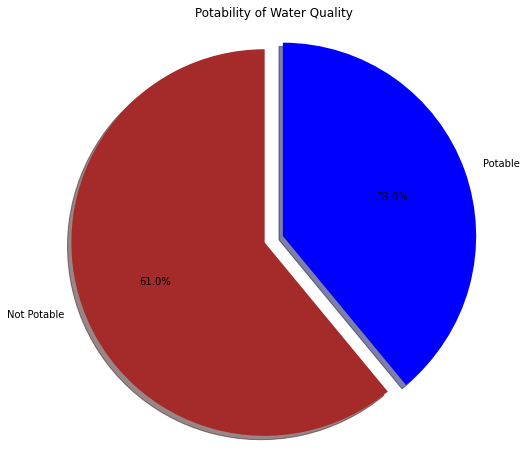

In [11]:
# Create Pie Chart for column potability

labels = ['Not Potable','Potable']
explode = (0.0,0.1)
colors = ['brown','blue']

plt.figure(figsize=(8,8))
plt.title('Potability of Water Quality')
plt.pie(data['potability'].value_counts(), labels=labels, explode=explode, 
       autopct='%1.1f%%',colors=colors, shadow=True, startangle=90)
plt.axis('equal') # ensures pie is drawn as a circle
plt.show()

Informasi yang bisa kita dapatkan dari pie chart di atas:
- Total yang bisa diminum dari 3.276 sample air adalah 1.278 atau 39% dalam persentase.
- Total yang tidak bisa diminum dari 3.276 sample air adalah 1.998 atau 61% dalam persentase.
- Total data target menunjukkan bahwa data imbalance.

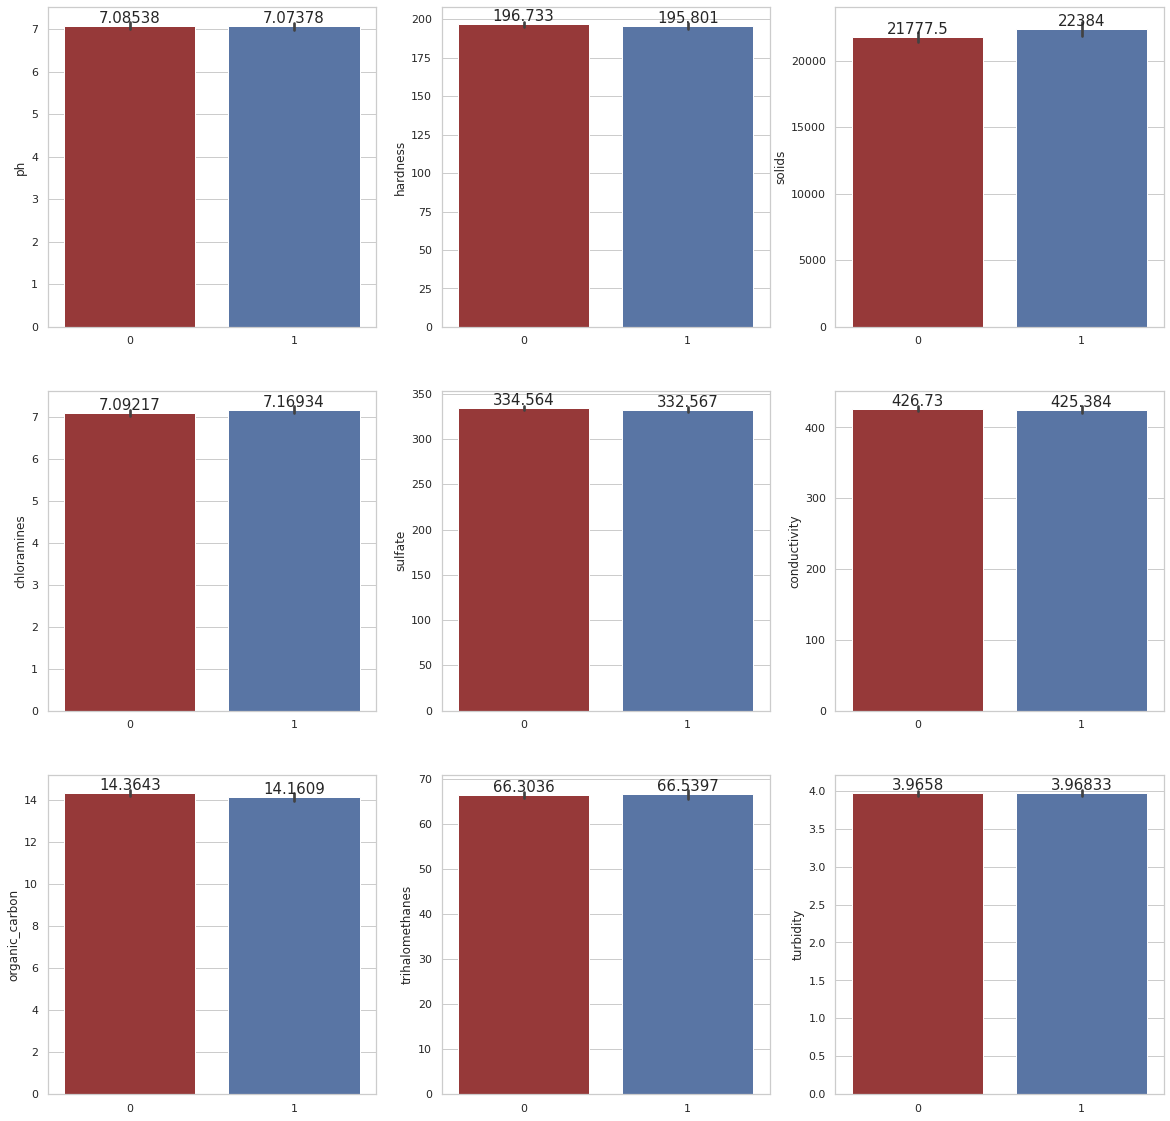

In [12]:
plt.figure(figsize=(20,20))
for col in range(len(data.columns[:-1])):
    sns.set_theme(style='whitegrid')
    plt.subplot(3,3,col+1)
    plt.rcParams.update({'font.size': 15})
    
    ax = sns.barplot(data=data, x='potability', y=data[data.columns[col]], palette=('brown','b'))
    ax.set_xlabel('')
    
    for i in ax.containers:
        ax.bar_label(i,)

Legend :
   - 0 = Not Potable
   - 1 = Potable

Jika dibandingkan antara Portable dan Not Portable dari unsur-unsur kimianya kita ketahui bahwa semua unsur yang ada pada feature saling mempengaruhi kualitas dari sample air. Terlihat bahwa rata-rata antara Portable dan Not Portable dari setiap unsur kimianya memiliki bobot yang hampir serupa bahkan cenderung sama.

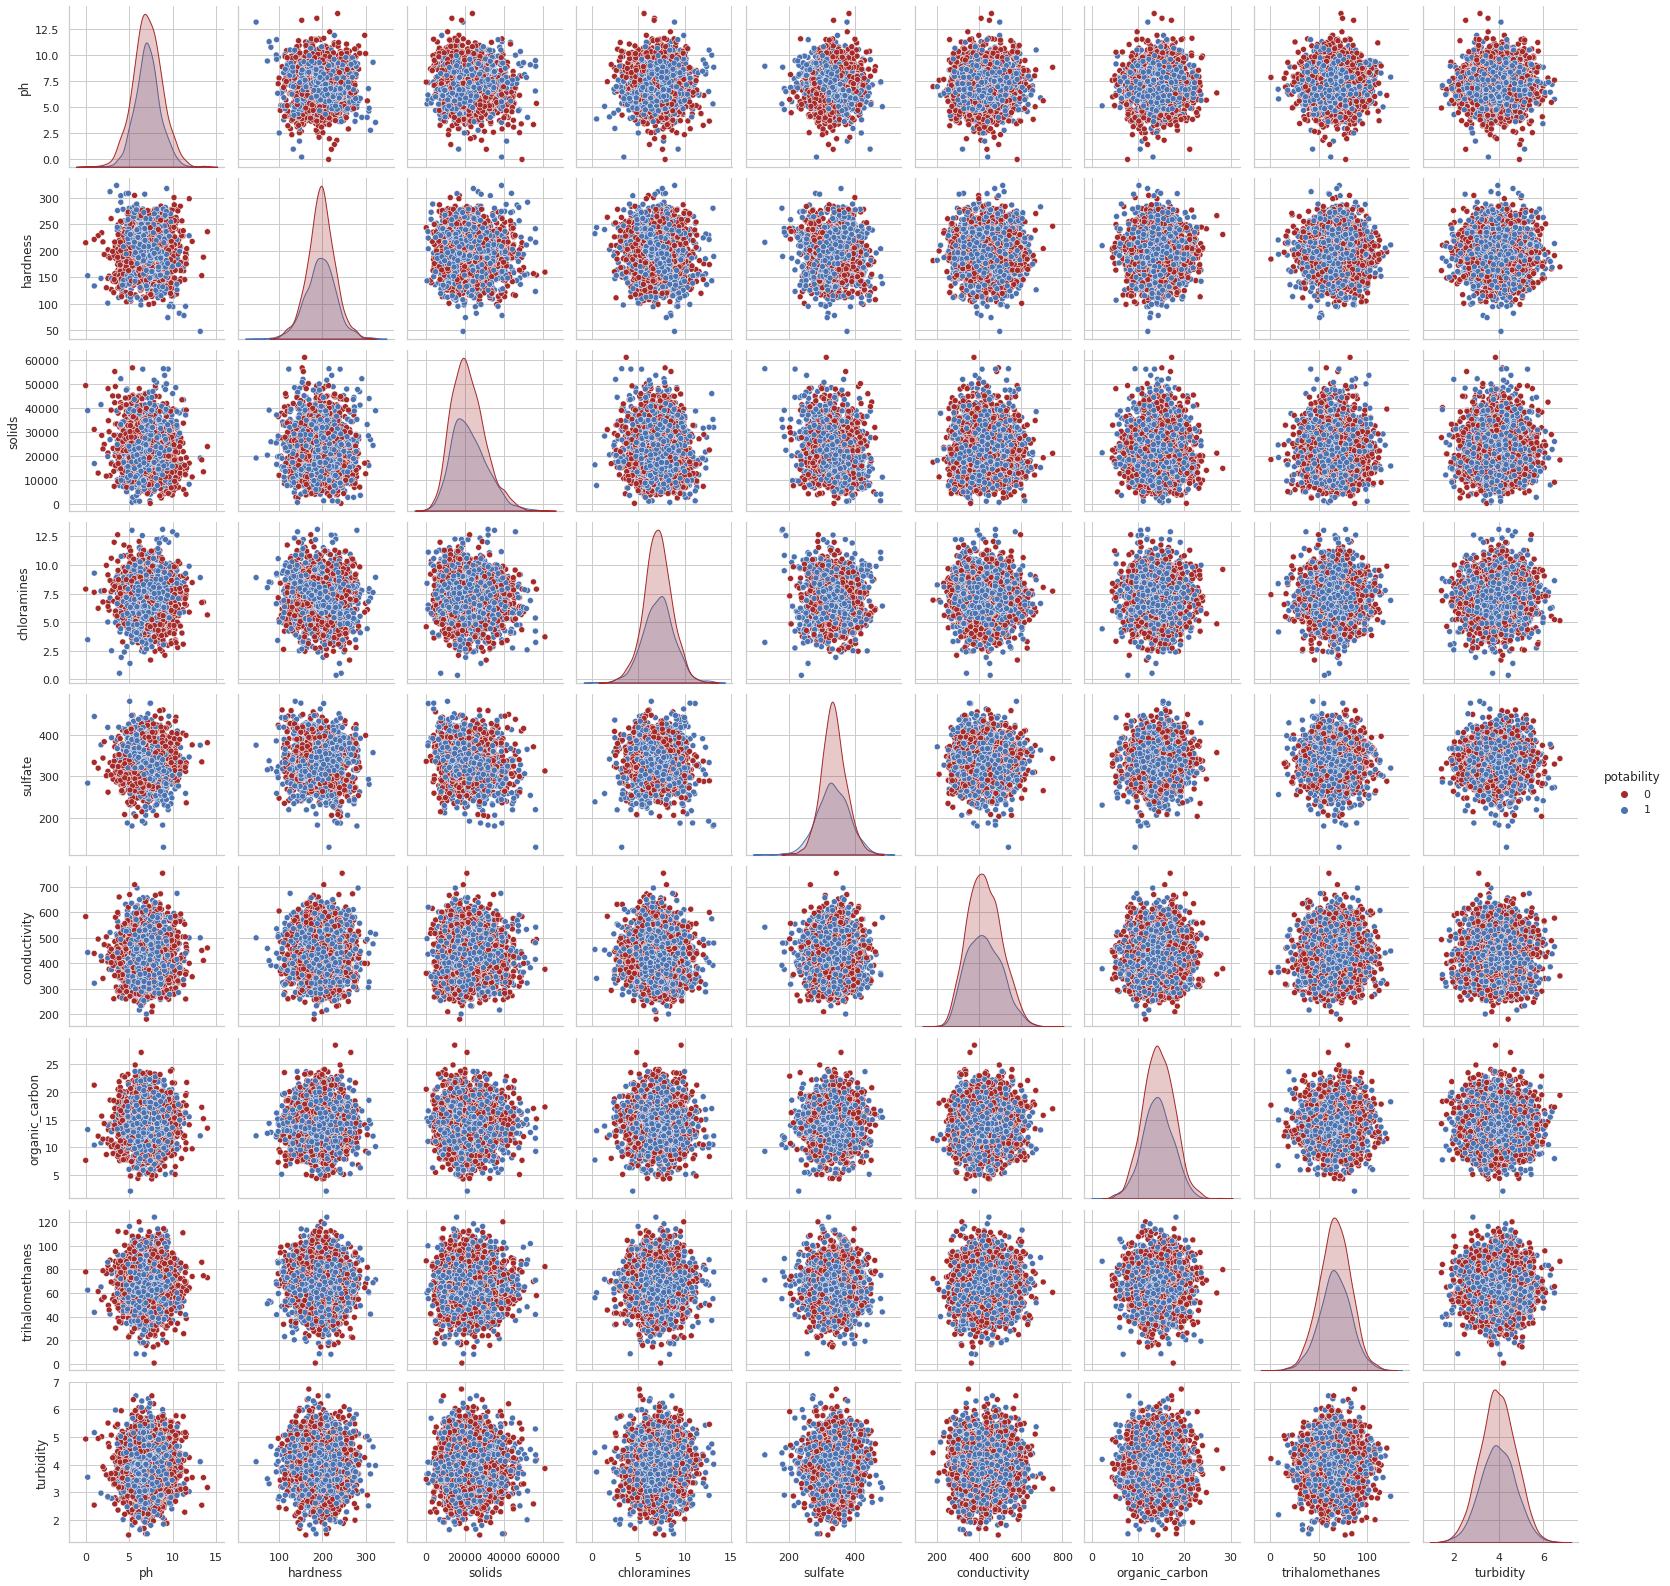

In [13]:
# Create pairplot

sns.pairplot(data=data, hue='potability', palette=('brown','b'))

- Persebaran data banyak berkumpul di tengah.
- Lebih banyak data yang menunjukkan bahwa air tidak layak diminum daripada yang layak di minum.
- Rata-rata sample air yang bisa diminum berkumpul di tengah dari data keseluruhan.

<AxesSubplot:title={'center':'Correlation between columns'}>

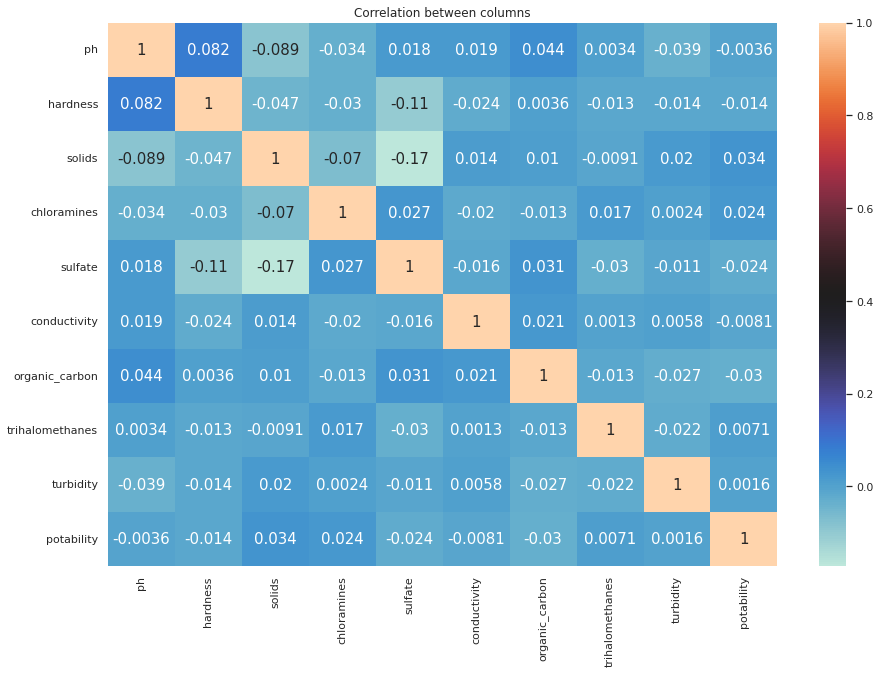

In [14]:
# Create heatmap

plt.figure(figsize=(15,10))
plt.title('Correlation between columns')
sns.heatmap(data.corr(), annot=True, cmap='icefire')

Jika dilihat hubungan dari antar kolom, hubungan sangatlah lemah. Dari intensitas warna, hubungan tertinggi hanya berada di sekitaran 0.082 antara kolom ph dan hardness. 

# 5 - Data Preprocessing

In [15]:
# Split X (Features) and y (Label)

X = data.drop('potability', axis=1)
y = data['potability']
X

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658


In [16]:
# Split between train-set and test-set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (2620, 9)
Test Size:  (656, 9)


### Handling Outliers

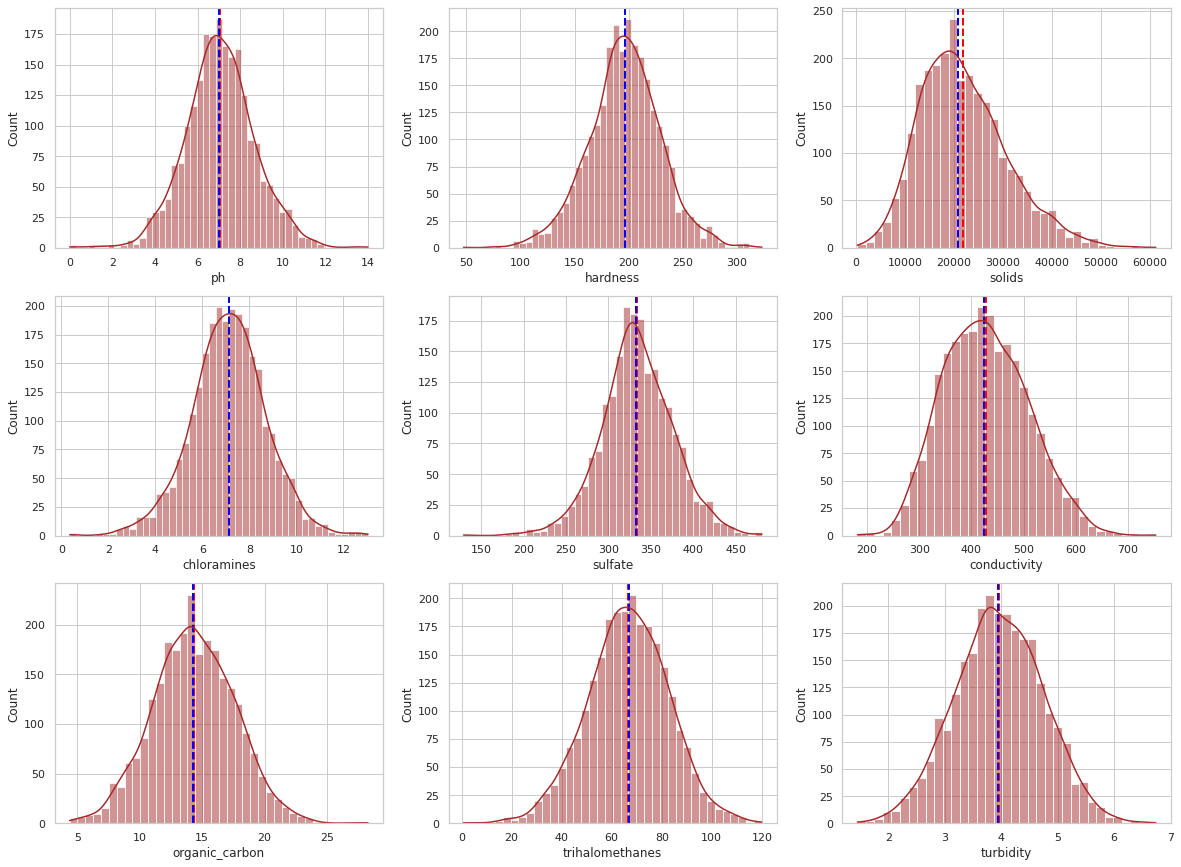

In [17]:
# Create Boxplot for check outliers in train-set

plt.figure(figsize=(20,15))
for col in range(len(X_train.columns)):
    plt.subplot(3,3,col+1)
    plt.axvline(X_train[X_train.columns[col]].mean(), color='red', linestyle='dashed', linewidth=2)
    plt.axvline(X_train[X_train.columns[col]].median(), color='blue', linestyle='dashed', linewidth=2)
    sns.histplot(X_train[X_train.columns[col]], kde=True, color='brown')

- Jika dilihat dari distribusi data pada features, semuanya simetris yang artinya data terdistribusi secara normal.
- Hanya pada data solids terlihat garis vertikal mean tertarik sedikit ke kanan, tetapi masih mendekati garis vertikal median.

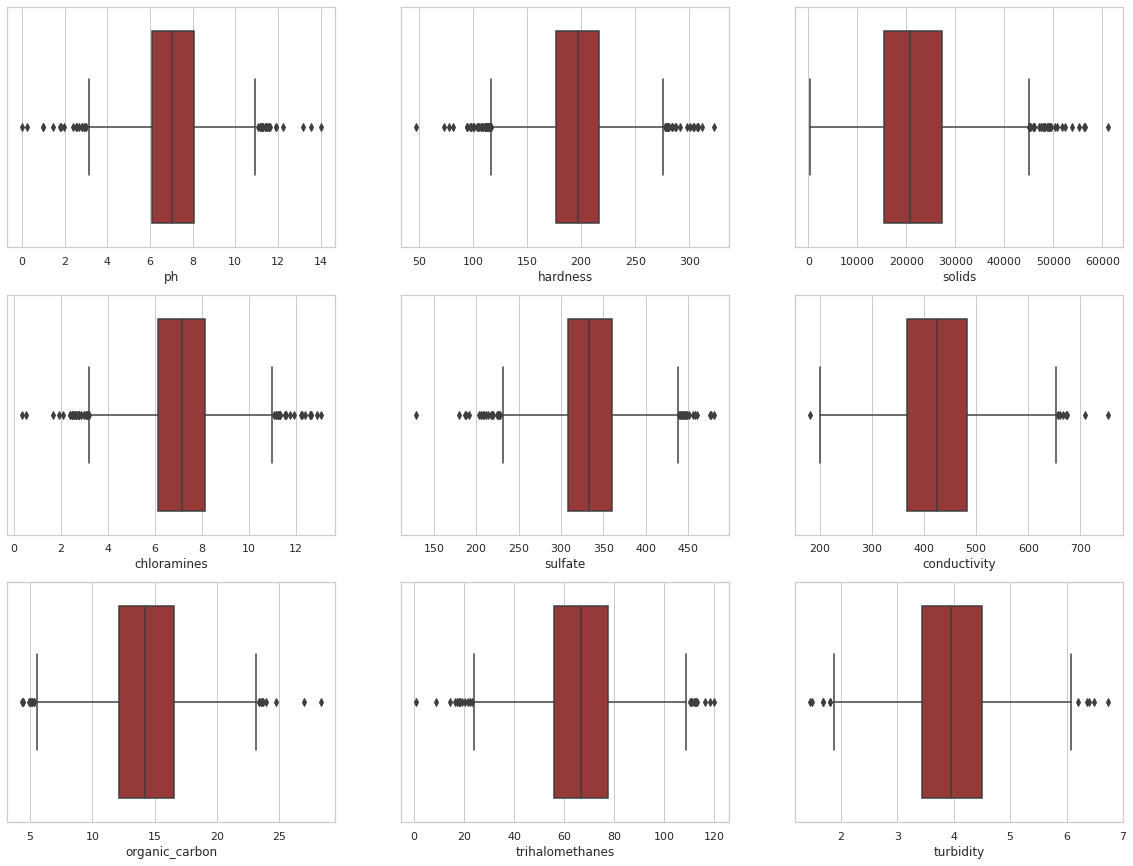

In [18]:
# Create Boxplot for check outliers in train-set

plt.figure(figsize=(20,15))
for col in range(len(X_train.columns)):
    plt.subplot(3,3,col+1)
    sns.boxplot(X_train[X_train.columns[col]], color='brown')

- Jika dilihat dari boxplot, persebaran data rata-rata berada di tengah. 
- Terlihat juga terdapat outliers di sisi kiri maupun kanan.

In [19]:
# Check Skew in train-set

print('='*16+'skewness'+'='*16)
print('')
for col in X_train:
    print(col + ' =', X_train[col].skew())
    print('='*40)

================skewness================

ph = 0.03400883473540399
hardness = -0.06982436724345345
solids = 0.6237147656867558
chloramines = -0.052331847834483164
sulfate = -0.05544822227920821
conductivity = 0.24880194034268746
organic_carbon = 0.037874790118306564
trihalomethanes = -0.08654679713028074
turbidity = -0.010610093599881923


- Jika dilihat dari nilai skew-nya, rata-rata data yang kita miliki terdistribusi normal.
- Hanya data solids yang sedikit melewati batas normalnya yaitu lebih 0.1.

In [20]:
# Handling Outliers use Z-Score

outliers1 = []
outliers2 = []
for col in X_train:
    
    # Search for upper and lower bound
    upr_limit = X_train[col].mean() + 3*X_train[col].std()
    lwr_limit = X_train[col].mean() -3*X_train[col].std()
    
    # Count upper and lower outliers
    outliers_upr = X_train[X_train[col] > upr_limit]
    outliers_lwr = X_train[X_train[col] < lwr_limit]
    
    outliers1.append(outliers_upr)
    outliers2.append(outliers_lwr)
    
    print(col+' upper Limit:', upr_limit)
    print(col+' Lower Limit:', lwr_limit)
    print(col+' Outliers upper:', len(outliers_upr))
    print(col+' Outliers lower:', len(outliers_lwr))
    print('='*50)

ph upper Limit: 11.918269989275748
ph Lower Limit: 2.2275065172458657
ph Outliers upper: 4
ph Outliers lower: 8
hardness upper Limit: 295.8786361362053
hardness Lower Limit: 96.57783370180118
hardness Outliers upper: 9
hardness Outliers lower: 7
solids upper Limit: 48449.25853047818
solids Lower Limit: -4501.955088107581
solids Outliers upper: 15
solids Outliers lower: 0
chloramines upper Limit: 11.858638423376402
chloramines Lower Limit: 2.3816954554987078
chloramines Outliers upper: 9
chloramines Outliers lower: 5
sulfate upper Limit: 459.7853002652632
sulfate Lower Limit: 208.5047318822589
sulfate Outliers upper: 4
sulfate Outliers lower: 9
conductivity upper Limit: 669.1498764597437
conductivity Lower Limit: 186.2239645299627
conductivity Outliers upper: 4
conductivity Outliers lower: 1
organic_carbon upper Limit: 24.169070048313653
organic_carbon Lower Limit: 4.493157106740288
organic_carbon Outliers upper: 3
organic_carbon Outliers lower: 3
trihalomethanes upper Limit: 114.994026

- Semua features memiliki Outliers atas dan bawah, hanya unsur solids yang tidak memiliki outliers di luar batas bawah.
- Outliers terbanyak di luar batas atas ada di unsur solids.
- Outliers terbanyak di luar batas bawah ada di unsur sulfate.

In [21]:
# Check len of outliers

outliers1 = pd.concat(outliers1)
outliers2 = pd.concat(outliers2)
outliers_full = pd.concat([outliers1,outliers2])
print('Total Outliers: ', len(outliers_full))

Total Outliers:  97


Total Outliers pada data train adalah 97 outliers. Jumlah outliers yang terdeteksi masih sedikit jika dibandingkan jumlah total data yang kita miliki yaitu 2.620 data-set train atau sekitar 3-4 persen. Langkah yang akan saya ambil adalah melakuakan drop pada data outliers.

In [22]:
# Drop Outliers X_train and y_train
X_train_clean = X_train.drop(outliers_full.index)
y_train =  y_train.drop(outliers_full.index)

# Reset Index X_train and y_train
X_train_clean.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_train_clean

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity
0,7.739326,207.764326,30412.372331,7.813967,289.413636,273.697139,19.113382,52.281104,3.645785
1,8.114665,236.493275,26631.212874,6.266782,275.090870,496.989792,18.588534,58.313345,2.654594
2,8.146186,191.382410,20506.698418,5.476949,NaN,445.931207,9.416902,57.363647,5.177964
3,6.096128,200.646224,16932.577103,6.542206,NaN,404.460052,9.063964,84.057101,2.956447
4,3.678432,187.496704,23103.410444,7.145145,NaN,350.540480,10.140068,67.456180,4.480109
...,...,...,...,...,...,...,...,...,...
2523,9.652563,205.206059,8508.153730,4.945417,386.541185,392.767453,12.446539,53.898037,3.192570
2524,8.016418,255.259493,30854.830468,8.761916,NaN,442.499532,11.094202,93.274232,5.320015
2525,7.380105,237.922637,16862.543476,7.101817,306.182925,478.654518,13.254475,92.864557,5.030452
2526,6.020995,178.500297,13095.149161,7.944802,NaN,437.298995,13.770783,59.872433,4.806017


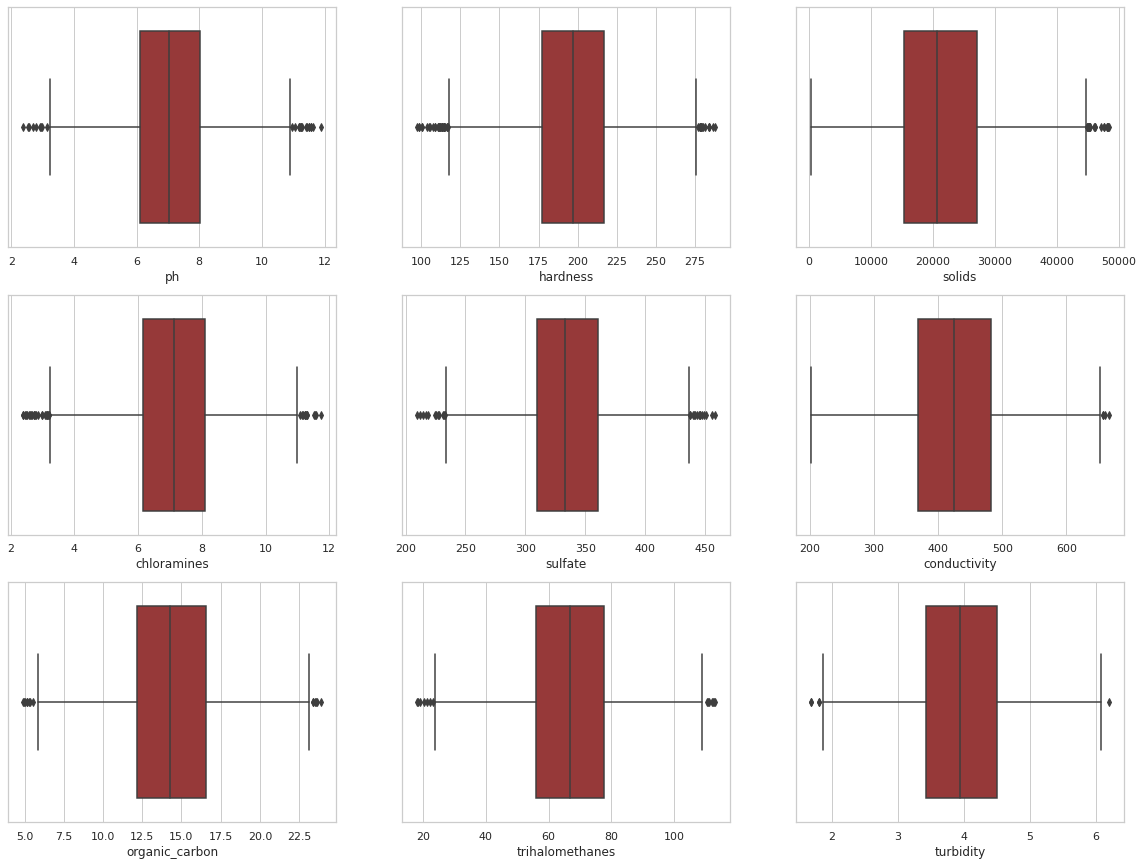

In [23]:
# Create Boxplot to check Outliers after drop outliers

plt.figure(figsize=(20,15))
for col in range(len(X_train_clean.columns)):
    plt.subplot(3,3,col+1)
    sns.boxplot(X_train_clean[X_train_clean.columns[col]], color='brown')

Setelah kita hilangkan outliers terlihat bahwa data di luar batasan atas dan bawahnya semakin sempit. Hal ini cukup bagus dan masih bisa kita toleransi karena data outliers sudah sangat dekat dengan batas normalnya.

## Missing Values

In [24]:
# Pipeline Imputer missing values with median

impute_pipe = Pipeline(
    steps=[('imputer',SimpleImputer(missing_values=np.nan, strategy='median'))
          ]
)

In [25]:
# Check Missing Values in X train

X_train_clean.isnull().sum()

ph                 393
hardness             0
solids               0
chloramines          0
sulfate            600
conductivity         0
organic_carbon       0
trihalomethanes    127
turbidity            0
dtype: int64

Terdapat missing values di kolom ph, sulfate dan trihalomethanes pada feature train.

In [26]:
# Check Missing Values in y train

y_train.isnull().sum()

0

In [27]:
# Check Missing Values in X test

X_test.isnull().sum()

ph                  90
hardness             0
solids               0
chloramines          0
sulfate            159
conductivity         0
organic_carbon       0
trihalomethanes     31
turbidity            0
dtype: int64

Terdapat missing values di kolom ph, sulfate dan trihalomethanes pada feature test.

In [28]:
# Check Missing Values in y test

y_test.isnull().sum()

0

In [29]:
# Fill Missing Values With Median

X_train_clean.fillna(X_train_clean.median(), inplace = True)
X_test.fillna(X_test.median(), inplace=True)

Mengganti missing values dengan nilai median.

In [30]:
# Check Missing Values after fill the values

X_train_clean.isnull().sum()

ph                 0
hardness           0
solids             0
chloramines        0
sulfate            0
conductivity       0
organic_carbon     0
trihalomethanes    0
turbidity          0
dtype: int64

In [31]:
# Check Missing Values after fill the values

X_test.isnull().sum()

ph                 0
hardness           0
solids             0
chloramines        0
sulfate            0
conductivity       0
organic_carbon     0
trihalomethanes    0
turbidity          0
dtype: int64

## Feature Selection

In [32]:
# Kbest with Anova Score

f_test = SelectKBest(score_func=f_classif, k=4)
fit = f_test.fit(X_train_clean, y_train)
fit.scores_

array([0.13237793, 0.06233532, 0.16232407, 0.43271926, 0.02580652,
       0.08559255, 0.55644296, 0.10472356, 0.12724779])

In [33]:
# Create dataframe and show result Anova Score

result = pd.Series(fit.scores_)
result.index = X_train.columns
result.sort_values(ascending=False)

organic_carbon     0.556443
chloramines        0.432719
solids             0.162324
ph                 0.132378
turbidity          0.127248
trihalomethanes    0.104724
conductivity       0.085593
hardness           0.062335
sulfate            0.025807
dtype: float64

Jika melihat dari skor anova, hubungan yang cukup tinggi dengan label yaitu:
- organi carbon
- chloramines
- solids
- ph
- turbidity
- trihalomethanes

In [34]:
# Kbest with Mutual Info Classifier

f_test = SelectKBest(score_func=mutual_info_classif, k=4)
fit = f_test.fit(X_train_clean, y_train)
fit.scores_

array([0.00499967, 0.01062646, 0.        , 0.        , 0.01118641,
       0.00253006, 0.        , 0.        , 0.0061573 ])

In [35]:
# Create dataframe and show result Mutual Info Classifier

mutual = pd.Series(fit.scores_)
mutual.index = X_train.columns
mutual.sort_values(ascending=True)

solids             0.000000
chloramines        0.000000
organic_carbon     0.000000
trihalomethanes    0.000000
conductivity       0.002530
ph                 0.005000
turbidity          0.006157
hardness           0.010626
sulfate            0.011186
dtype: float64

Jika kita melihat dari skor mutual info classifier didapatkan yang cukup tinggi dengan label yaitu:
- solids
- chloramines
- organic carbon
- trihalomethanes

### Drop Columns Not Feature 

In [36]:
# Drop Columns not use for features

X_train_clean.drop(columns=['hardness','sulfate'], inplace=True)
X_test.drop(columns=['hardness','sulfate'],inplace=True)
X_train_clean

,ph,solids,chloramines,conductivity,organic_carbon,trihalomethanes,turbidity
0,7.739326,30412.372331,7.813967,273.697139,19.113382,52.281104,3.645785
1,8.114665,26631.212874,6.266782,496.989792,18.588534,58.313345,2.654594
2,8.146186,20506.698418,5.476949,445.931207,9.416902,57.363647,5.177964
3,6.096128,16932.577103,6.542206,404.460052,9.063964,84.057101,2.956447
4,3.678432,23103.410444,7.145145,350.540480,10.140068,67.456180,4.480109
...,...,...,...,...,...,...,...
2523,9.652563,8508.153730,4.945417,392.767453,12.446539,53.898037,3.192570
2524,8.016418,30854.830468,8.761916,442.499532,11.094202,93.274232,5.320015
2525,7.380105,16862.543476,7.101817,478.654518,13.254475,92.864557,5.030452
2526,6.020995,13095.149161,7.944802,437.298995,13.770783,59.872433,4.806017


## Scalling

In [37]:
# Create pipeline for standard scaller

scaler_pipeline = Pipeline(
        steps=[('std_scaler', StandardScaler())]
    )

X_scaled = scaler_pipeline.fit_transform(X_train_clean)
X_ts_scaled = scaler_pipeline.transform(X_test)

Scaling data numerik pada feature menggunakan Standard Scaler. Alasan saya menggunakan Standard Scaler dikarenakan data numerik pada data-set terdistribusi normal.

In [38]:
# Show data scaled

X_scaled

array([[ 0.47677472,  1.02119678,  0.45975958, ...,  1.46941538,
        -0.92639117, -0.40551921],
       [ 0.74401214,  0.57618663, -0.55627973, ...,  1.30735615,
        -0.5371403 , -1.69218209],
       [ 0.76645426, -0.14461636, -1.07496454, ..., -1.52460588,
        -0.5984228 ,  1.58339787],
       ...,
       [ 0.22101373, -0.57350225, -0.00791052, ..., -0.33966273,
         1.69239411,  1.39191362],
       [-0.74665605, -1.01689235,  0.5456797 , ..., -0.18024028,
        -0.43653487,  1.10057428],
       [ 1.62166507, -0.93986955,  0.14439523, ..., -0.59278311,
        -1.47191333, -0.44528566]])

## Resampling

In [39]:
# Smotenc definition

sm = SMOTENC(random_state=42, categorical_features=[0])

In [40]:
# fit smotenc in data to varibel

X_res, y_res = sm.fit_resample(X_scaled, y_train)
print(f'Resampled dataset samples per class {Counter(y_res)}')

Resampled dataset samples per class Counter({0: 1559, 1: 1559})


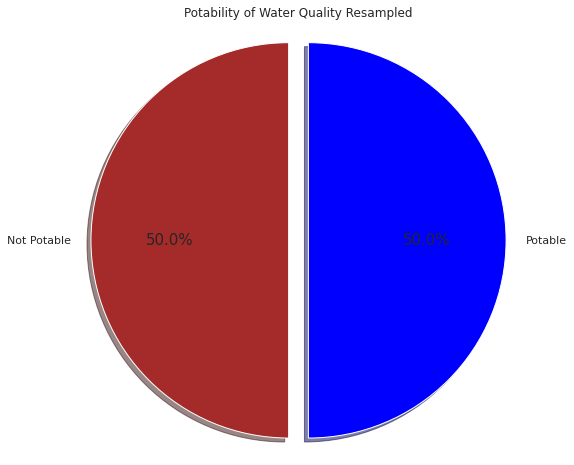

In [41]:
# Create Pie Chart for column potability

labels = ['Not Potable','Potable']
explode = (0.0,0.1)
colors = ['brown','blue']

plt.figure(figsize=(8,8))
plt.title('Potability of Water Quality Resampled')
plt.pie(y_res.value_counts(), labels=labels, explode=explode, 
       autopct='%1.1f%%',colors=colors, shadow=True, startangle=90)
plt.axis('equal') # ensures pie is drawn as a circle
plt.show()

- Karena sebelumnya data imbalance pada target di data-set, kita melakukan resampling pada data kita untuk membuat model kita bekerja lebih baik dalam melakukan klasifikasi.
- Sekarang Jumlah data antara yang Not Portable dan Portable telah balance dengan masing-masing jumlah valuenya sejumlah 1.559.

# 6 - Model Definition

In [42]:
# Definition model into variabel

rf = RandomForestClassifier()
knn = KNeighborsClassifier()
log = LogisticRegression(C=0.1, solver='lbfgs')
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=2)
ada = AdaBoostClassifier()
bagging = BaggingClassifier()
gb = GradientBoostingClassifier(n_estimators=100,loss='deviance',learning_rate=0.1, 
                                criterion='friedman_mse', max_depth=5, min_samples_split=5, 
                                min_samples_leaf=2)

# group to a variabel for looping
model = [rf, knn, log, dt, ada, bagging, gb]

# 7 - Model Training

In [43]:
# Model Training

for model_train in model:
    model_train.fit(X_res, y_res)

# 8 - Model Evaluation

In [44]:
# Show Metrick Evaluation

for model_select in model:
    y_pred_train = model_select.predict(X_res)
    y_pred_test = model_select.predict(X_ts_scaled)
    
    y_prob_train = model_select.predict_proba(X_res)[:,1]
    y_prob_test = model_select.predict_proba(X_ts_scaled)[:,1]
    
    print((f'{model_select}').split('(')[0])
    print("="*28,"TRAINING","="*28)
    print(classification_report(y_res, y_pred_train, zero_division=0))
    print('ROC-AUC Score Train:',roc_auc_score(y_res, y_prob_train))
    print("\n")
    print("="*30,"TEST","="*30)
    print(classification_report(y_test, y_pred_test, zero_division=0))
    print('ROC-AUC Score Test:',roc_auc_score(y_test, y_prob_test))

    print("\n")
    print("\n")

RandomForestClassifier
============================ TRAINING ============================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1559
           1       1.00      1.00      1.00      1559

    accuracy                           1.00      3118
   macro avg       1.00      1.00      1.00      3118
weighted avg       1.00      1.00      1.00      3118

ROC-AUC Score Train: 1.0


============================== TEST ==============================
              precision    recall  f1-score   support

           0       0.65      0.64      0.65       396
           1       0.46      0.47      0.47       260

    accuracy                           0.57       656
   macro avg       0.56      0.56      0.56       656
weighted avg       0.58      0.57      0.58       656

ROC-AUC Score Test: 0.5967851592851593




KNeighborsClassifier
============================ TRAINING ============================
              precision    reca

- Model di coba dengan settingan defaultnya
- Rata-rata model yang kita coba terjadi OverFit.
- Logistic just fit, tetapi baik score dan recall terlalu kecil dan Adaboost antara train dan test juga hampir berdekatan tapi dengan persentase hanya 0.5 persenan.
- Penulis ingin berfokus ke presisi nilai 0 dikarenakan dalam penentuan kualitas air lebih baik model lebih presisi dalam menebak sample air yang tidak bisa diminum daripada model gagal memprediksi sample air yang tidak bisa diminum tetapi dikatakan bisa untuk diminum.
- Penulis mempertimbangkan 2 model antara Random Forest atau Bagging Classifier yang di data train memeiliki nilai keseluruhan yang baik tetapi untuk di tes nilai recall dan presisi pada prediksi label 0 / Not Potable yang tertinggi di antara model lainnya.

### Hyperparamater Tuning

In [45]:
# Hyperparameter Tuning for Random Forest

params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt','log2','None'],
    'n_estimators': [200],
    'max_depth': [10],
    'min_samples_split': [6],
}

In [46]:
# Model Definition and training

bg_grid = GridSearchCV(rf, params, cv=3, scoring='roc_auc', return_train_score=True)
bg_grid.fit(X_res, y_res)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10],
                         'max_features': ['sqrt', 'log2', 'None'],
                         'min_samples_split': [6], 'n_estimators': [200]},
             return_train_score=True, scoring='roc_auc')

In [47]:
# search for best parameters

print('best params:', bg_grid.best_params_)
print('best score:', bg_grid.best_score_)

best params: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 6, 'n_estimators': 200}
best score: 0.6575571122778215


In [48]:
# Show Best parameters

bg_best = bg_grid.best_estimator_
print(bg_best)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=6,
                       n_estimators=200)


In [49]:
# Predict result

bg_train_p = bg_best.predict(X_res)
bg_ts_p = bg_best.predict(X_test)

print("="*30,"TRAINING","="*30)
print('training set: \n', classification_report(y_res, bg_train_p))
print("\n")
print("="*30,"TEST","="*30)
print('test set: \n', classification_report(y_test, bg_ts_p))
print("\n")

============================== TRAINING ==============================
training set: 
               precision    recall  f1-score   support

           0       0.97      0.82      0.89      1559
           1       0.85      0.97      0.90      1559

    accuracy                           0.90      3118
   macro avg       0.91      0.90      0.90      3118
weighted avg       0.91      0.90      0.90      3118



============================== TEST ==============================
test set: 
               precision    recall  f1-score   support

           0       0.60      1.00      0.75       396
           1       0.00      0.00      0.00       260

    accuracy                           0.60       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.36      0.60      0.45       656





Setelah model Random Forest di hyper Tuning hasil tidak begitu bagus pada data test. Saya juga sudah mencoba model lain dan hanya mendapatkan best-score antara 0.5 -0.65. Kemungkinan harus dilakukan pengaturan hyperparameter tuning kembali, teteapi karena terkendala lamanya proses training model maka penulis akan menggunakan model terbaik yang ada dahulu dan akan melakukan pengembangan untuk kedepannya.

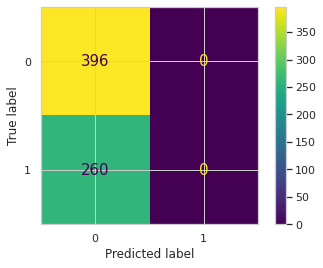

In [50]:
# Confussion matrix show the result Hyperparamater Tuning

cm = confusion_matrix(y_test, bg_ts_p, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_) 
disp.plot()
plt.show()

- Hasil tuning pada confusion matrix memperlihatkan bahwa model sangat bagus dalam memprediksi label 1 tetapi juga memiliki error II yang cukup besar.
- Setelah saya lakukan kembali percobaan merubah paramater terjadi perubahan kembali di mana sekarang data sangat bagus menebak label 0, tetapi juga Jumlah Erro 1 nya juga besar.

# 9 - Model Saving

In [51]:
# Pipe Line complete

preprocessor = ColumnTransformer(
    transformers=[
        ("num", scaler_pipeline, X_train.columns)
    ]
)

model_kuy = Pipeline(
    steps= [("impute", impute_pipe),
            ("preprocessor", preprocessor),
            ("classifier", bg_best)]
)

In [60]:
# Save the Files

with open('bg_best.pkl', 'wb') as r:
    pickle.dump(bg_best, r)
    
with open('scaler_pipeline', 'wb') as h:
    pickle.dump(scaler_pipeline, h)
    
with open('model', 'wb') as m:
    pickle.dump(model_kuy, m)

# 10 - Model Inference

In [53]:
# Data Inference

df_inf = {'ph':[5.70,5.80,6.20,8.22,7.38,5.71,5.85,6.70,6.22,7.81],
          'hardness':[185.26,187.42,172.33,190.28,180.69, 185.80,187.90,190.55,173.63,190.66],
          'solids':[12000.34,13000.22,14000.84,25000.22,24000.53, 12000.40,12000.50,13270.00,22960.34,24620.87],
          'chloramines':[5.88,6.23,7.23,8.90,6.14,5.89,5.72,6.40,7.22,9.23],
          'sulfate':[305.22,307.56,308.45,309.88,320.22,306.22,306.33,307.06,309.98,402.22],
          'conductivity':[410,210,310,510,630,420,240,380,610,220],
          'organic_carbon':[10.12,12.32,13.44,15.62,13.22,10.23,11.42,12.42,15.33,16.77],
          'trihalomethanes':[62.44,63.68,66.90,67.90,70.45,62.32,63.33,64.52,69.72,72.19],
          'turbidity':[3.25,3.79,4.55,5.67,6.77,3.22,3.73,4.51,7.67,8.77]}
inf_data = pd.DataFrame(df_inf)
inf_data

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity
0,5.70,185.26,12000.34,5.88,305.22,410,10.12,62.44,3.25
1,5.80,187.42,13000.22,6.23,307.56,210,12.32,63.68,3.79
2,6.20,172.33,14000.84,7.23,308.45,310,13.44,66.90,4.55
3,8.22,190.28,25000.22,8.90,309.88,510,15.62,67.90,5.67
4,7.38,180.69,24000.53,6.14,320.22,630,13.22,70.45,6.77
5,5.71,185.80,12000.40,5.89,306.22,420,10.23,62.32,3.22
6,5.85,187.90,12000.50,5.72,306.33,240,11.42,63.33,3.73
7,6.70,190.55,13270.00,6.40,307.06,380,12.42,64.52,4.51
8,6.22,173.63,22960.34,7.22,309.98,610,15.33,69.72,7.67
9,7.81,190.66,24620.87,9.23,402.22,220,16.77,72.19,8.77


In [54]:
# Drop Features not use

inf_data.drop(columns=['hardness','sulfate'],inplace=True)

In [55]:
# Scalling with standard scaller

inf_scaled = scaler_pipeline.fit_transform(inf_data)
inf_scaled

array([[-0.97268271, -0.93472812, -0.83762583,  0.10992994, -1.3853354 ,
        -1.14603163, -1.04909677],
       [-0.8594484 , -0.75788787, -0.54562479, -1.26419433, -0.3588154 ,
        -0.7821189 , -0.75753102],
       [-0.40651117, -0.58091673,  0.28866388, -0.5771322 ,  0.1637766 ,
         0.1628803 , -0.34717922],
       [ 1.88082187,  1.36444987,  1.68192597,  0.79699208,  1.1809646 ,
         0.45635831,  0.25754975],
       [ 0.92965368,  1.18764322, -0.62071078,  1.62146664,  0.0611246 ,
         1.20472724,  0.85147998],
       [-0.96135928, -0.93471751, -0.82928295,  0.17863616, -1.3340094 ,
        -1.18124899, -1.06529486],
       [-0.80283125, -0.93469982, -0.97111202, -1.05807569, -0.7787554 ,
        -0.8848362 , -0.78992721],
       [ 0.15966038, -0.71017418, -0.40379572, -0.0961887 , -0.3121554 ,
        -0.53559737, -0.36877668],
       [-0.38386431,  1.00367368,  0.280321  ,  1.48405422,  1.0456506 ,
         0.99048829,  1.3374229 ],
       [ 1.4165612 ,  1.2973

In [56]:
# Create predict DataFrame
rf_inf_p = bg_best.predict(inf_scaled)
rf_inf_p = pd.DataFrame(rf_inf_p, columns=['Predicted'])

In [57]:
# Concat and show predict

inference = pd.concat([inf_data, rf_inf_p], axis=1)
inference

,ph,solids,chloramines,conductivity,organic_carbon,trihalomethanes,turbidity,Predicted
0,5.70,12000.34,5.88,410,10.12,62.44,3.25,1
1,5.80,13000.22,6.23,210,12.32,63.68,3.79,1
2,6.20,14000.84,7.23,310,13.44,66.90,4.55,1
3,8.22,25000.22,8.90,510,15.62,67.90,5.67,1
4,7.38,24000.53,6.14,630,13.22,70.45,6.77,0
5,5.71,12000.40,5.89,420,10.23,62.32,3.22,1
6,5.85,12000.50,5.72,240,11.42,63.33,3.73,1
7,6.70,13270.00,6.40,380,12.42,64.52,4.51,1
8,6.22,22960.34,7.22,610,15.33,69.72,7.67,0
9,7.81,24620.87,9.23,220,16.77,72.19,8.77,1


Model berjalan dengan baik saat dicoba ke data baru.

# 11 - Conclusions

Dari analisis yang telah saya lakukan bisa saya simpulkan bahwa total data target menunjukkan bahwa data imbalance dimana antara sample air yang bisa diminum adalah 39% dalam persentase sedangkan sample air yang tidak bisa diminum adalah 61% dalam persentase.

Jika dibandingkan antara Portable(label 1) dan Not Portable (Label 0) dari unsur-unsur kimianya kita ketahui bahwa semua unsur yang ada pada feature saling mempengaruhi kualitas dari sample air. Terlihat bahwa rata-rata antara Portable dan Not Portable dari setiap unsur kimianya memiliki bobot yang hampir serupa bahkan cenderung sama.

Ini beberapa Informasi pemakaian aman dari setiap unsur kimia yang merupakan bagian dari feature yang kita gunakan:
   - **pH** baik untuk kesehatan antara 6,5 dan 8,5. 

   - **Solids**, Batas yang diinginkan adalah 500 mg/l dan batas maksimum adalah 1000 mg/l yang ditentukan untuk tujuan minum.

   - **Chloramines** Kadar klorin hingga 4 miligram per liter (mg/L atau 4 bagian per juta (ppm)) dianggap aman dalam air minum.**

   - **Conductivity**, nilai EC tidak boleh melebihi 400 S/cm.

   - **Total Organic Carbon (TOC)** < 2 mg/L sebagai TOC pada air olahan/minum**, dan <4 mg/Lit pada sumber air yang digunakan untuk pengolahan.

   - **Trihalomethanes(THM)** Kadar THM hingga 80 ppm dianggap aman dalam air minum.**

   - **Turbidity**, rekomendasi WHO sebesar 5,00 NTU.
   
Penyebaran data banyak terjadi di tengah jika dilihat dari distribusi dan persebaran data pada features, semuanya simetris yang artinya data terdistribusi secara normal. Karena sebelumnya data imbalance pada target di data-set, kita melakukan resampling pada data kita untuk membuat model kita bisa belajar dengan lebih maksimal dari data yang imbang untuk model klasifikasi.

pertama-tama model saya coba dengan settingan defaultnya terlebih dahulu, rata-rata model yang kita coba mengalami OverFit. Pada model Logistic just fit, tetapi baik score dan recall terlalu kecil sedangkan pada model Adaboost antara train dan test juga hampir berdekatan tapi dengan persentase hanya 0.5 persenan.

Penulis ingin berfokus ke presisi nilai 0 dikarenakan dalam penentuan kualitas air lebih baik model lebih presisi dalam menebak sample air yang tidak bisa diminum daripada model gagal memprediksi sample air yang tidak bisa diminum tetapi dikatakan bisa untuk diminum karena akan sangat riskan.

Penulis mempertimbangkan 2 model antara Random Forest atau Bagging Classifier yang di data train memiliki nilai keseluruhan yang baik tetapi untuk di tes nilai recall dan presisi pada prediksi label 0 / Not Potable yang tertinggi di antara model lainnya.

Hasil tuning pada confusion matrix memperlihatkan bahwa model sangat bagus dalam memprediksi label 1 tetapi juga memiliki error II yang cukup besar. Tetapi setelah saya lakukan kembali percobaan merubah paramater terjadi perubahan kembali di mana sekarang data sangat bagus menebak label 0, tetapi juga Jumlah Error 1 nya juga besar. Saat kita coba model kita dengan data baru, model berjalan dengan baik.